In [577]:
library(ggplot2) # ggplot
library(ggfortify) # autoplot
library(gridExtra)
library(dplyr) # select

In [578]:
#(a) 수리시간(Minutes) 와 부품의 수(Units) 를 관계시키는 선형 회귀 모형을 적합
setwd('D:/Working/03.Korea/회귀분석/Final-Report/google-play-store-apps')

# kaggle 데이터
# $ 환율은 1177.42
gplay_data <- read.csv(file="googleplaystore.csv", header=TRUE, sep=",")

In [573]:
gplay_data[1:5,]
gplay_data$Category <- as.numeric(as.factor(gplay_data$Category)) # Category 를 수치형으로 변경
gplay_data$Type <- as.numeric(as.factor(gplay_data$Type))         # Type (Free / Paid) 를 수치형으로 변경
gplay_paid_data <- subset(gplay_data, Type == "2")
gplay_data[1:5,]

Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
MEDICAL,4.6,92,32.0,1000,Paid,79.99,2018
MEDICAL,4.6,92,32.0,1000,Paid,79.99,2018
MEDICAL,4.0,6,1.3,100,Paid,39.99,2018
LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,2017
MEDICAL,3.5,214,68.0,1000,Paid,33.99,2017


Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
21,4.6,92,32.0,1000,2,79.99,2018
21,4.6,92,32.0,1000,2,79.99,2018
21,4.0,6,1.3,100,2,39.99,2018
19,4.2,134,1.8,1000,2,37.99,2017
21,3.5,214,68.0,1000,2,33.99,2017


In [574]:
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2221 -0.1790  0.0963  0.3237  1.0750 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.515e+02  1.582e+01  -9.575  < 2e-16 ***
Category     -2.951e-03  7.862e-04  -3.753 0.000176 ***
Reviews       1.844e-08  4.274e-09   4.314 1.62e-05 ***
Size          7.168e-04  2.829e-04   2.533 0.011316 *  
Installs     -1.012e-11  1.563e-10  -0.065 0.948380    
Type          1.571e-01  3.146e-02   4.994 6.05e-07 ***
Price        -5.893e-04  3.299e-03  -0.179 0.858250    
Last_Updated  7.707e-02  7.839e-03   9.832  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5364 on 7202 degrees of freedom
Multiple R-squared:  0.02718,	Adjusted R-squared:  0.02623 
F-statistic: 28.74 on 7 and 7202 DF,  p-value: < 2.2e-16


In [575]:
gplay_data <- gplay_data %>% dplyr::select(-Installs, -Price)  # 결정 된 항목의 열을 삭제

In [576]:
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2220 -0.1789  0.0962  0.3238  1.0750 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.514e+02  1.581e+01  -9.580  < 2e-16 ***
Category     -2.952e-03  7.861e-04  -3.755 0.000175 ***
Reviews       1.827e-08  3.382e-09   5.402 6.80e-08 ***
Size          7.163e-04  2.829e-04   2.532 0.011360 *  
Type          1.540e-01  2.619e-02   5.881 4.26e-09 ***
Last_Updated  7.705e-02  7.833e-03   9.837  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5363 on 7204 degrees of freedom
Multiple R-squared:  0.02717,	Adjusted R-squared:  0.0265 
F-statistic: 40.24 on 5 and 7204 DF,  p-value: < 2.2e-16


In [551]:
gplay_paid_data <- subset(gplay_data, Type == "2")
gplay_paid_data[1:5,]
gplay_free_data <- subset(gplay_data, Type == "1")
gplay_free_data[1:5,]

Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
21,4.6,92,32.0,1000,2,79.99,2018
21,4.6,92,32.0,1000,2,79.99,2018
21,4.0,6,1.3,100,2,39.99,2018
19,4.2,134,1.8,1000,2,37.99,2017
21,3.5,214,68.0,1000,2,33.99,2017


,Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
455,8,1,1,9.2,10,1,0,2018
456,21,1,1,28.0,50,1,0,2017
457,15,1,1,4.9,1000,1,0,2018
458,21,1,1,2.3,100,1,0,2016
459,13,1,3,8.4,500,1,0,2016


In [552]:
gplay_paid_data <- subset(gplay_paid_data, Last_Updated == "2017")
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
gplay_paid_data[1:5,]

Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
19,4.2,134,1.8,1000,2,37.99,2017
21,3.5,214,68.0,1000,2,33.99,2017
21,3.5,214,68.0,1000,2,33.99,2017
21,4.2,168,25.0,10000,2,24.99,2017
21,4.2,168,25.0,10000,2,24.99,2017


In [553]:
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35307 -0.30836  0.09052  0.41948  0.95971 

Coefficients: (2 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.943e+00  2.012e-01  19.597   <2e-16 ***
Category      8.568e-03  9.021e-03   0.950    0.344    
Reviews       1.690e-05  4.208e-05   0.402    0.689    
Size         -7.362e-05  2.828e-03  -0.026    0.979    
Installs      3.132e-06  4.557e-06   0.687    0.493    
Type                 NA         NA      NA       NA    
Price        -3.443e-05  8.364e-03  -0.004    0.997    
Last_Updated         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6316 on 107 degrees of freedom
Multiple R-squared:  0.05703,	Adjusted R-squared:  0.01296 
F-statistic: 1.294 on 5 and 107 DF,  p-value: 0.2719


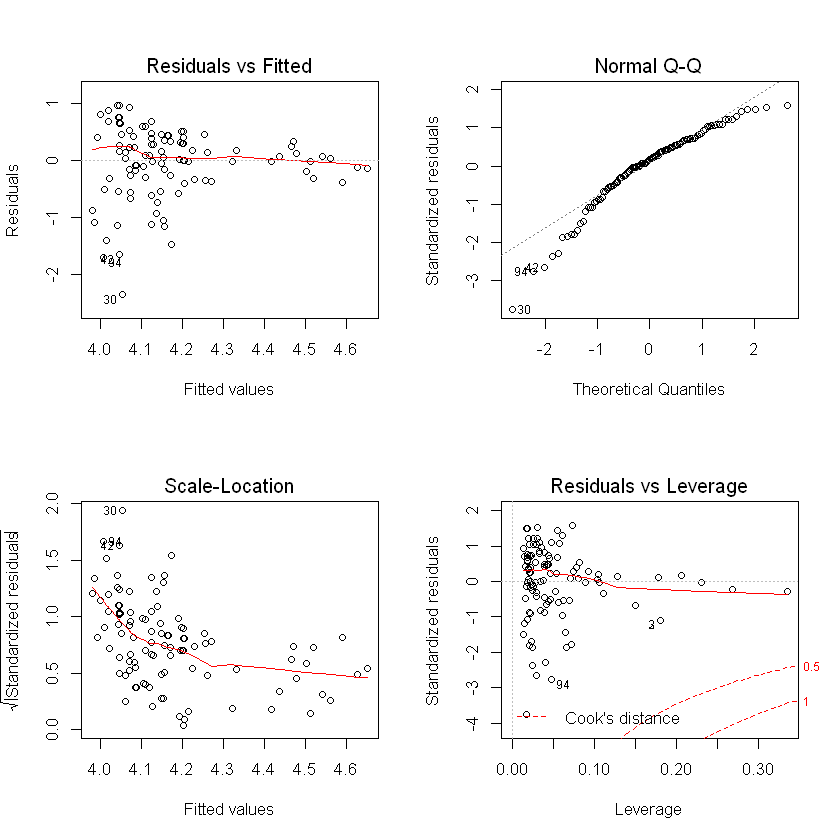

In [554]:
par(mfrow=c(2,2))
plot(gplay_reg)

In [555]:
gplay_paid_data <- gplay_paid_data[c(-30,-1),]

In [556]:
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7651 -0.3119  0.1045  0.3995  0.9174 

Coefficients: (2 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.021e+00  1.903e-01  21.129   <2e-16 ***
Category      6.086e-03  8.506e-03   0.715    0.476    
Reviews       1.934e-05  3.959e-05   0.489    0.626    
Size         -1.479e-04  2.688e-03  -0.055    0.956    
Installs      2.421e-06  4.289e-06   0.564    0.574    
Type                 NA         NA      NA       NA    
Price        -1.007e-03  8.747e-03  -0.115    0.909    
Last_Updated         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.594 on 105 degrees of freedom
Multiple R-squared:  0.05324,	Adjusted R-squared:  0.008154 
F-statistic: 1.181 on 5 and 105 DF,  p-value: 0.3236


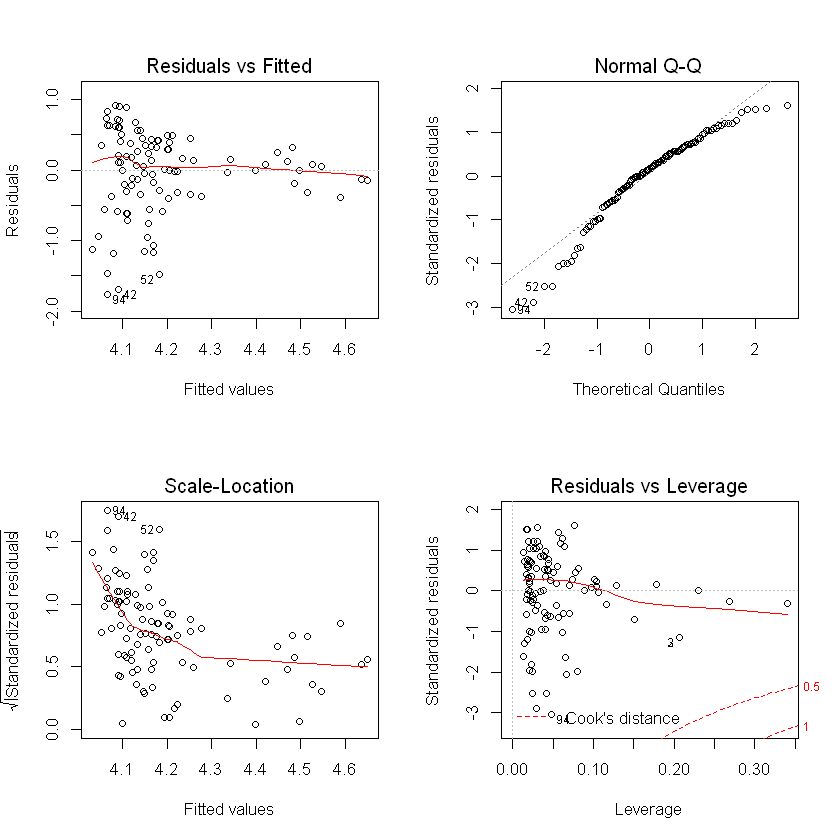

In [557]:
par(mfrow=c(2,2))
plot(gplay_reg)

In [515]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)

Category,Rating,Reviews,Size,Installs,Type,Price,Last_Updated
25,3.5,77,1.2,1e+03,2,19.99,2016
12,4.8,171,1.0,1e+03,2,10.00,2016
20,3.3,3,26.0,1e+02,2,9.99,2016
21,4.5,63,25.0,1e+04,2,9.99,2016
21,4.5,63,25.0,1e+04,2,9.99,2016
26,3.1,19,4.5,5e+02,2,8.99,2016
31,3.7,40,9.0,1e+03,2,8.49,2016
15,4.2,13004,46.0,1e+05,2,6.99,2016
12,4.2,146,20.0,5e+03,2,5.99,2016
30,3.0,19,22.0,1e+03,2,4.99,2016


In [516]:
gplay_paid_data <- gplay_paid_data %>% dplyr::select(-Type, -Last_Updated)

In [517]:
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-11,-20, -55),]
nrow(gplay_paid_data)

[1] 59

[1] 56

In [518]:
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97228 -0.16701 -0.00862  0.30762  0.73993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.677e+00  2.204e-01  21.224   <2e-16 ***
Category    -1.626e-02  9.011e-03  -1.804   0.0772 .  
Reviews     -1.064e-06  5.775e-06  -0.184   0.8546    
Size        -1.982e-03  2.780e-03  -0.713   0.4792    
Installs     1.551e-07  5.276e-07   0.294   0.7700    
Price       -3.480e-02  1.969e-02  -1.767   0.0833 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.443 on 50 degrees of freedom
Multiple R-squared:  0.1302,	Adjusted R-squared:  0.04327 
F-statistic: 1.497 on 5 and 50 DF,  p-value: 0.2075


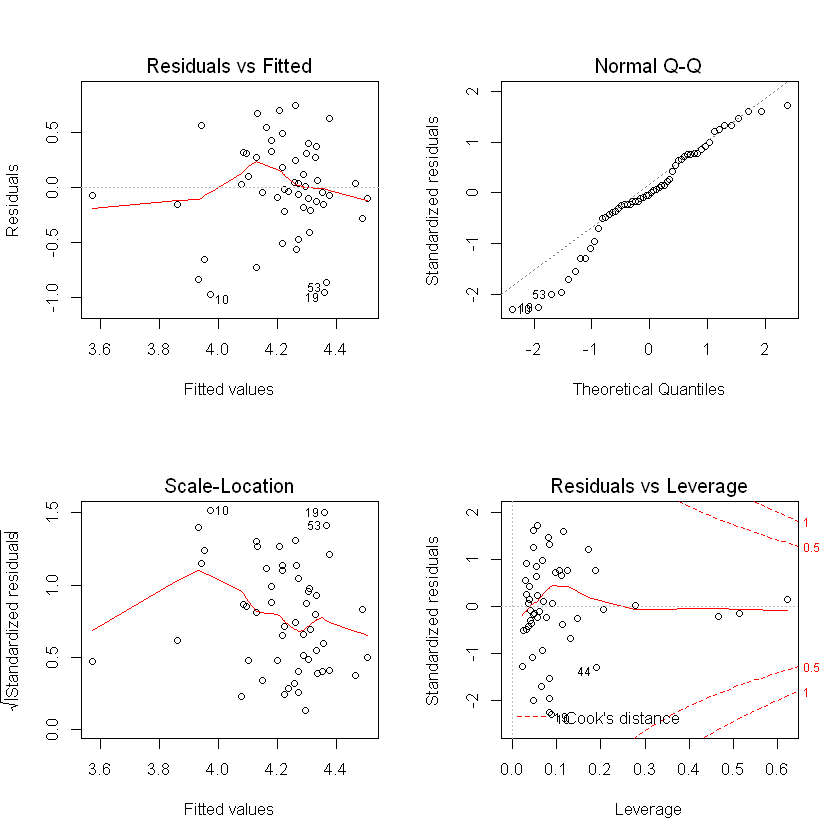

In [519]:
par(mfrow=c(2,2))
plot(gplay_reg)

In [520]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 56

[1] 53

[1] 53

[1] 50


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85859 -0.19077 -0.02466  0.24740  0.73087 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.599e+00  2.147e-01  21.420   <2e-16 ***
Category    -8.911e-03  9.280e-03  -0.960    0.342    
Reviews     -1.354e-06  5.795e-06  -0.234    0.816    
Size        -3.503e-03  2.933e-03  -1.195    0.239    
Installs     1.518e-07  5.551e-07   0.273    0.786    
Price       -2.975e-02  1.918e-02  -1.551    0.128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4158 on 44 degrees of freedom
Multiple R-squared:  0.08605,	Adjusted R-squared:  -0.01781 
F-statistic: 0.8285 on 5 and 44 DF,  p-value: 0.5364


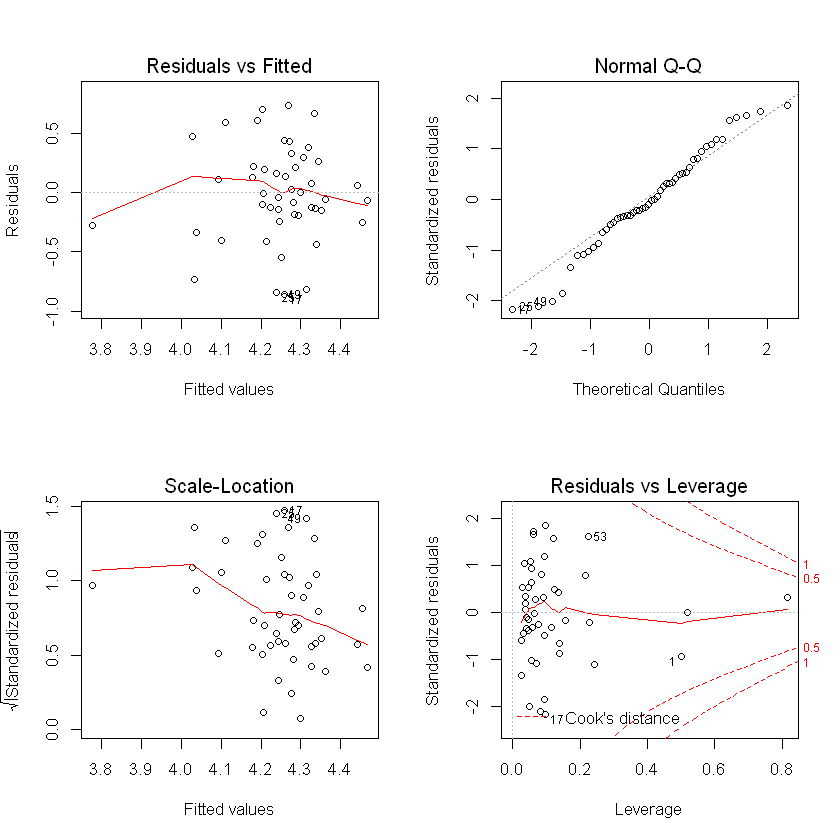

In [523]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)

nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 50

[1] 47


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87546 -0.19173 -0.04263  0.29579  0.71116 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.576e+00  2.234e-01  20.482   <2e-16 ***
Category    -8.496e-03  9.589e-03  -0.886    0.381    
Reviews      2.492e-06  1.230e-05   0.203    0.840    
Size        -2.735e-03  3.078e-03  -0.889    0.379    
Installs    -2.625e-07  1.283e-06  -0.205    0.839    
Price       -2.922e-02  1.958e-02  -1.492    0.143    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4236 on 41 degrees of freedom
Multiple R-squared:  0.0794,	Adjusted R-squared:  -0.03287 
F-statistic: 0.7072 on 5 and 41 DF,  p-value: 0.6214


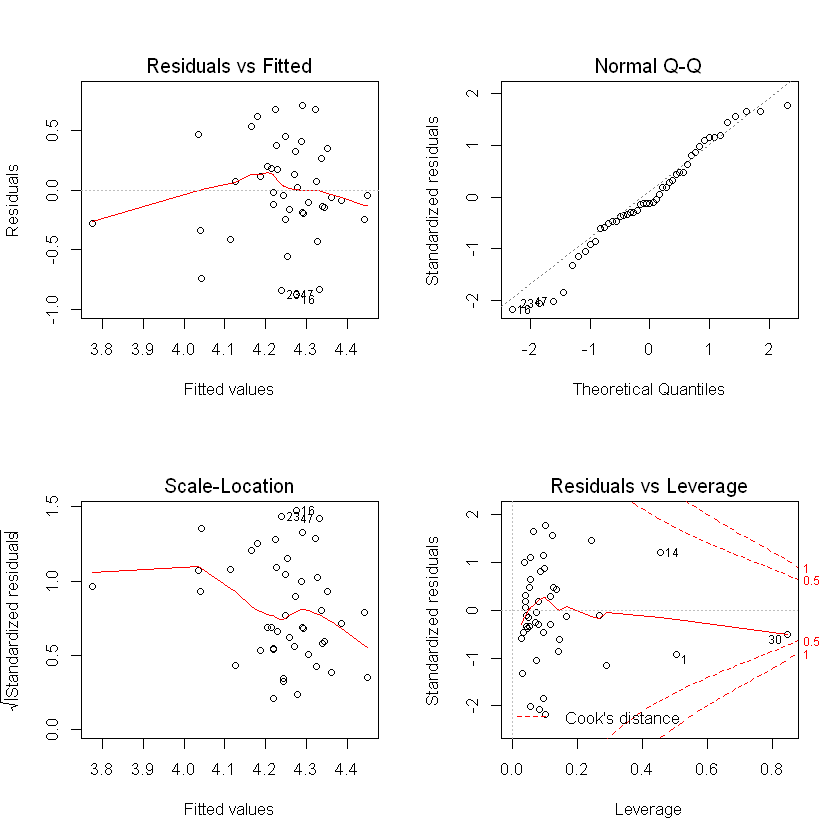

In [524]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 47

[1] 44


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84989 -0.18371 -0.03629  0.26213  0.70668 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.722e+00  2.144e-01  22.024   <2e-16 ***
Category    -1.536e-02  9.244e-03  -1.661    0.105    
Reviews     -2.713e-07  1.150e-05  -0.024    0.981    
Size        -3.867e-03  3.235e-03  -1.195    0.239    
Installs     2.713e-08  1.201e-06   0.023    0.982    
Price       -2.596e-02  1.827e-02  -1.420    0.164    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3936 on 38 degrees of freedom
Multiple R-squared:  0.1296,	Adjusted R-squared:  0.01505 
F-statistic: 1.131 on 5 and 38 DF,  p-value: 0.3605


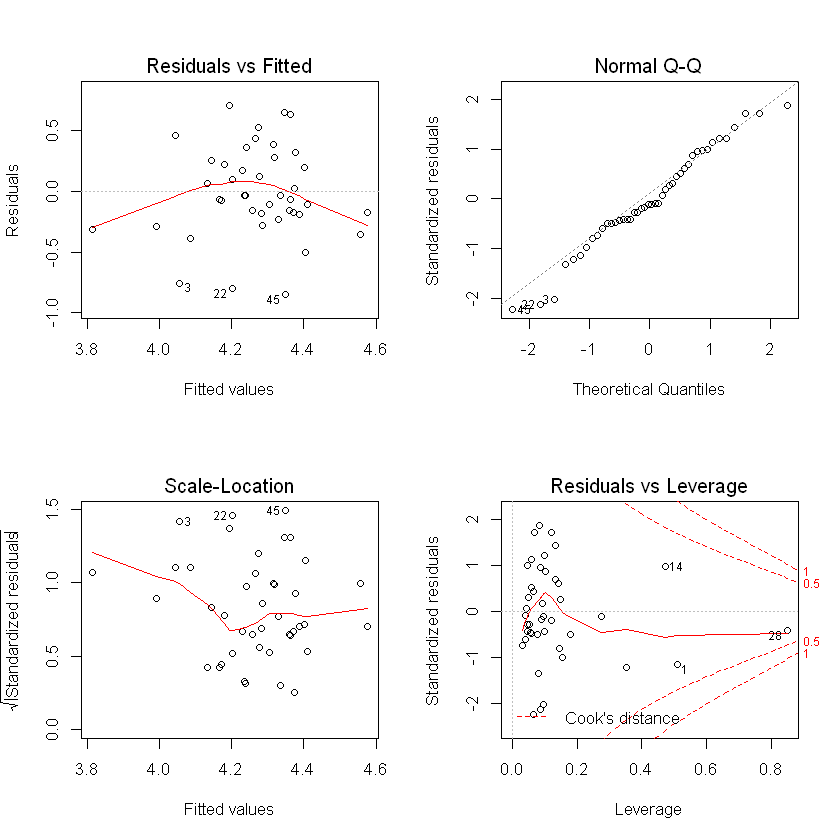

In [525]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
gplay_paid_data <- gplay_paid_data[c(-16, -23, -47),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 42

[1] 40


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81068 -0.12256 -0.02218  0.22547  0.71057 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.516e+00  2.227e-01  20.282   <2e-16 ***
Category    -1.278e-02  8.809e-03  -1.451    0.156    
Reviews      1.232e-06  1.082e-05   0.114    0.910    
Size        -2.487e-03  3.097e-03  -0.803    0.427    
Installs    -1.450e-07  1.130e-06  -0.128    0.899    
Price        1.814e-02  2.555e-02   0.710    0.483    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3699 on 34 degrees of freedom
Multiple R-squared:  0.08854,	Adjusted R-squared:  -0.0455 
F-statistic: 0.6606 on 5 and 34 DF,  p-value: 0.6557


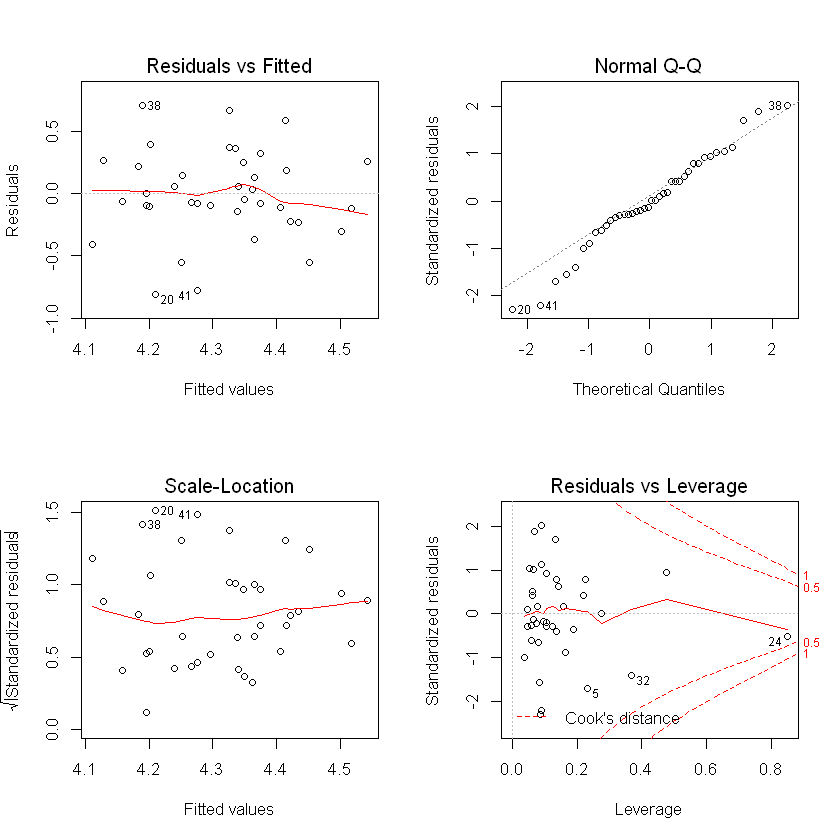

In [527]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-43, -21, -1),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 40

[1] 38


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81704 -0.12749  0.00616  0.23159  0.71484 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.602e+00  2.457e-01  18.729   <2e-16 ***
Category    -1.502e-02  9.609e-03  -1.563    0.128    
Reviews      9.031e-07  1.102e-05   0.082    0.935    
Size        -3.311e-03  3.276e-03  -1.010    0.320    
Installs    -1.247e-07  1.151e-06  -0.108    0.914    
Price        1.404e-02  2.668e-02   0.526    0.602    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3764 on 32 degrees of freedom
Multiple R-squared:  0.1013,	Adjusted R-squared:  -0.03917 
F-statistic: 0.7211 on 5 and 32 DF,  p-value: 0.6125


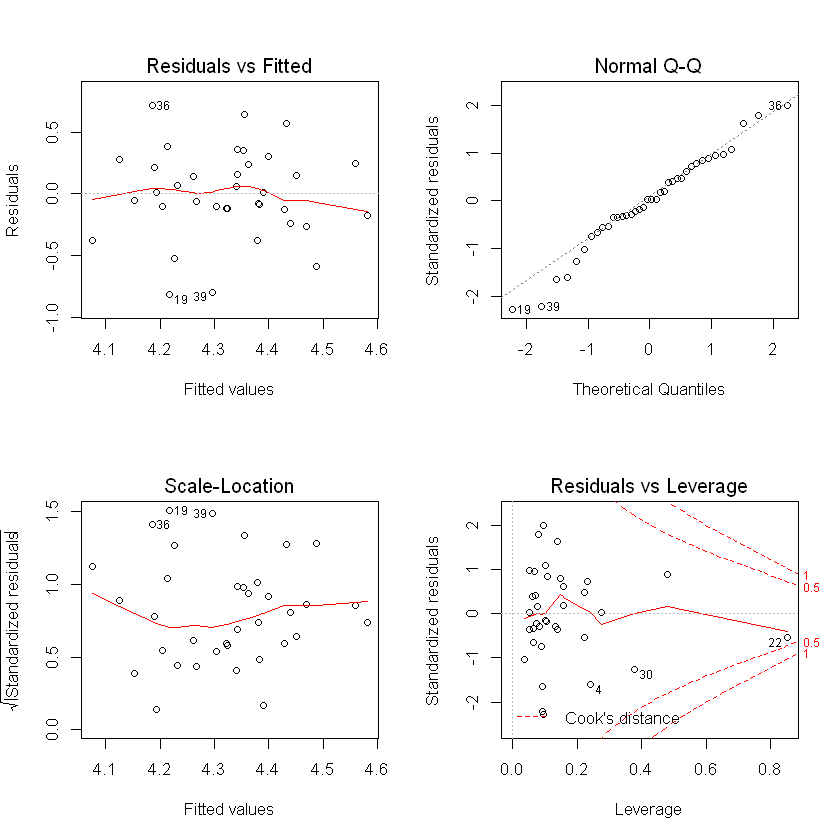

In [528]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
gplay_paid_data <- gplay_paid_data[c(-16, -23, -47),]
gplay_paid_data <- gplay_paid_data[c(-20, -38, -41),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 38

[1] 36


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82730 -0.15859 -0.01756  0.19025  0.66414 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.607e+00  2.352e-01  19.590   <2e-16 ***
Category    -1.044e-02  9.262e-03  -1.128    0.268    
Reviews      1.559e-06  1.038e-05   0.150    0.882    
Size        -3.818e-03  3.096e-03  -1.233    0.227    
Installs    -2.477e-07  1.085e-06  -0.228    0.821    
Price        5.579e-03  2.570e-02   0.217    0.830    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3544 on 30 degrees of freedom
Multiple R-squared:  0.09221,	Adjusted R-squared:  -0.05909 
F-statistic: 0.6095 on 5 and 30 DF,  p-value: 0.6933


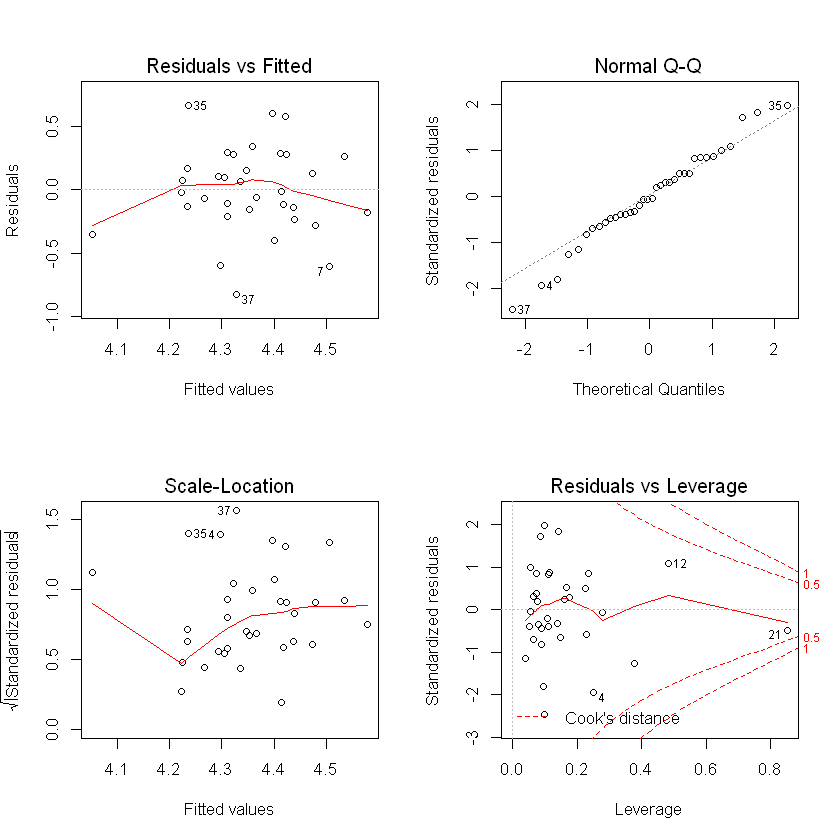

In [529]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
gplay_paid_data <- gplay_paid_data[c(-16, -23, -47),]
gplay_paid_data <- gplay_paid_data[c(-20, -38, -41),]
gplay_paid_data <- gplay_paid_data[c(-19, -36, -39),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 36

[1] 34


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61979 -0.17585 -0.01389  0.18365  0.59060 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.548e+00  2.204e-01  20.635   <2e-16 ***
Category    -5.348e-03  8.663e-03  -0.617    0.542    
Reviews      3.207e-06  8.981e-06   0.357    0.724    
Size        -2.971e-03  2.683e-03  -1.107    0.278    
Installs    -4.881e-07  9.402e-07  -0.519    0.608    
Price        7.869e-03  2.391e-02   0.329    0.745    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3059 on 28 degrees of freedom
Multiple R-squared:  0.1086,	Adjusted R-squared:  -0.05055 
F-statistic: 0.6824 on 5 and 28 DF,  p-value: 0.6405


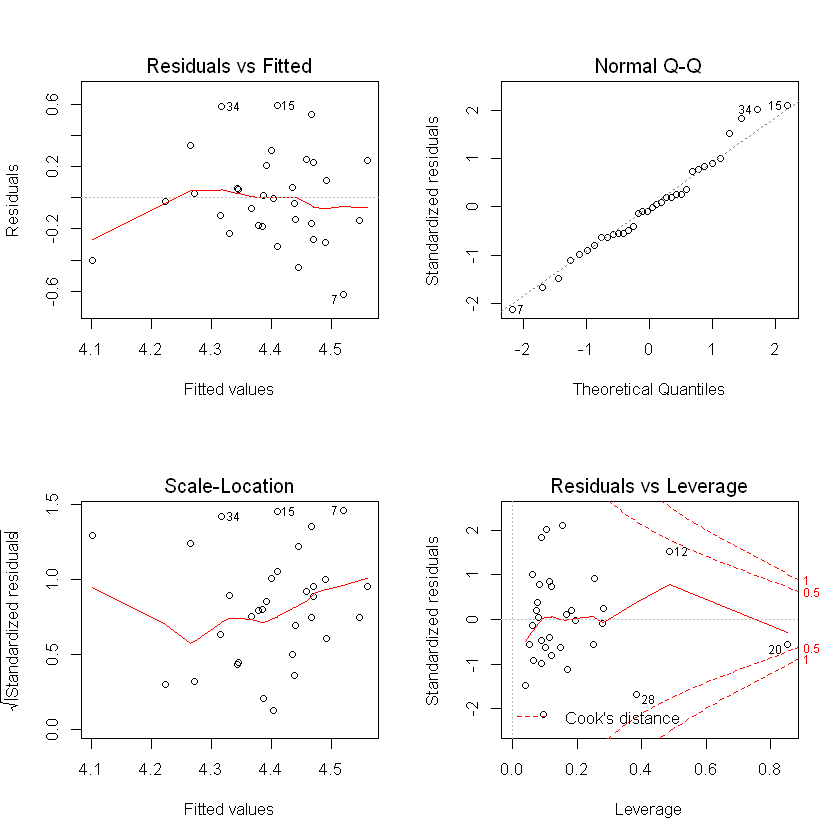

In [530]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
gplay_paid_data <- gplay_paid_data[c(-16, -23, -47),]
gplay_paid_data <- gplay_paid_data[c(-20, -38, -41),]
gplay_paid_data <- gplay_paid_data[c(-19, -36, -39),]
gplay_paid_data <- gplay_paid_data[c(-35, -37, -4),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 34

[1] 31


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65832 -0.17575 -0.02931  0.14797  0.59723 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.576e+00  2.232e-01  20.497   <2e-16 ***
Category    -2.698e-03  8.979e-03  -0.300    0.766    
Reviews      2.973e-06  8.830e-06   0.337    0.739    
Size        -3.556e-03  2.648e-03  -1.343    0.191    
Installs    -5.169e-07  9.241e-07  -0.559    0.581    
Price        3.928e-03  2.427e-02   0.162    0.873    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2993 on 25 degrees of freedom
Multiple R-squared:  0.1499,	Adjusted R-squared:  -0.02012 
F-statistic: 0.8817 on 5 and 25 DF,  p-value: 0.5078


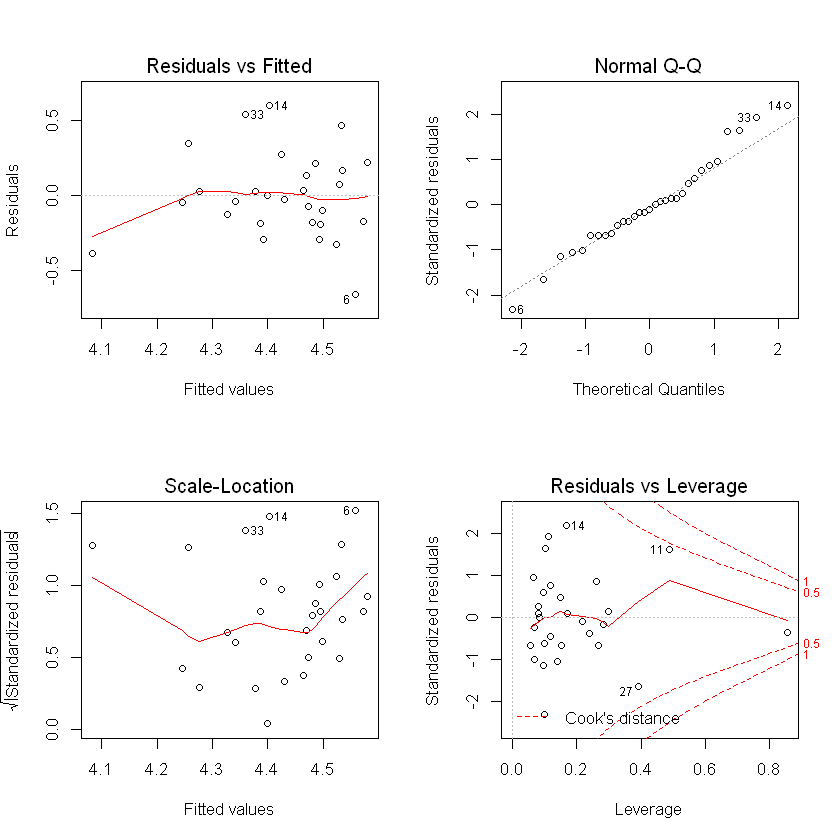

In [531]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-10,-19, -53),]
gplay_paid_data <- gplay_paid_data[c(-6,-18, -51),]
gplay_paid_data <- gplay_paid_data[c(-17, -25, -49),]
gplay_paid_data <- gplay_paid_data[c(-16, -23, -47),]
gplay_paid_data <- gplay_paid_data[c(-20, -38, -41),]
gplay_paid_data <- gplay_paid_data[c(-19, -36, -39),]
gplay_paid_data <- gplay_paid_data[c(-35, -37, -4),]
gplay_paid_data <- gplay_paid_data[c(-34, -15, -7),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 31

[1] 29


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44788 -0.15495 -0.01276  0.11090  0.56735 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.840e+00  2.398e-01  20.187 3.95e-16 ***
Category    -1.077e-02  9.110e-03  -1.183   0.2490    
Reviews      9.772e-07  7.989e-06   0.122   0.9037    
Size        -6.177e-03  2.631e-03  -2.348   0.0278 *  
Installs    -3.495e-07  8.341e-07  -0.419   0.6791    
Price       -2.505e-03  2.233e-02  -0.112   0.9117    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2682 on 23 degrees of freedom
Multiple R-squared:  0.2961,	Adjusted R-squared:  0.1431 
F-statistic: 1.935 on 5 and 23 DF,  p-value: 0.1272


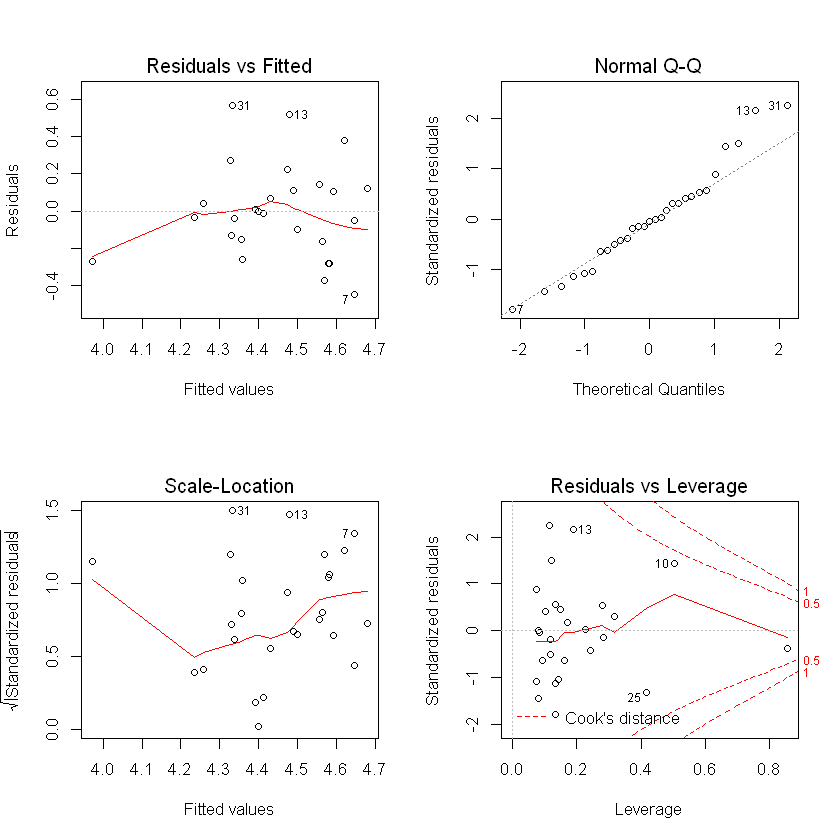

In [532]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)

nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 29

[1] 27


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43572 -0.14681 -0.01829  0.11987  0.57557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.810e+00  2.422e-01  19.854 4.34e-15 ***
Category    -1.191e-02  8.953e-03  -1.330   0.1978    
Reviews      1.214e-06  7.756e-06   0.156   0.8771    
Size        -5.491e-03  2.662e-03  -2.063   0.0517 .  
Installs    -3.553e-07  8.089e-07  -0.439   0.6650    
Price        3.096e-03  2.196e-02   0.141   0.8892    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.26 on 21 degrees of freedom
Multiple R-squared:  0.2943,	Adjusted R-squared:  0.1263 
F-statistic: 1.752 on 5 and 21 DF,  p-value: 0.1668


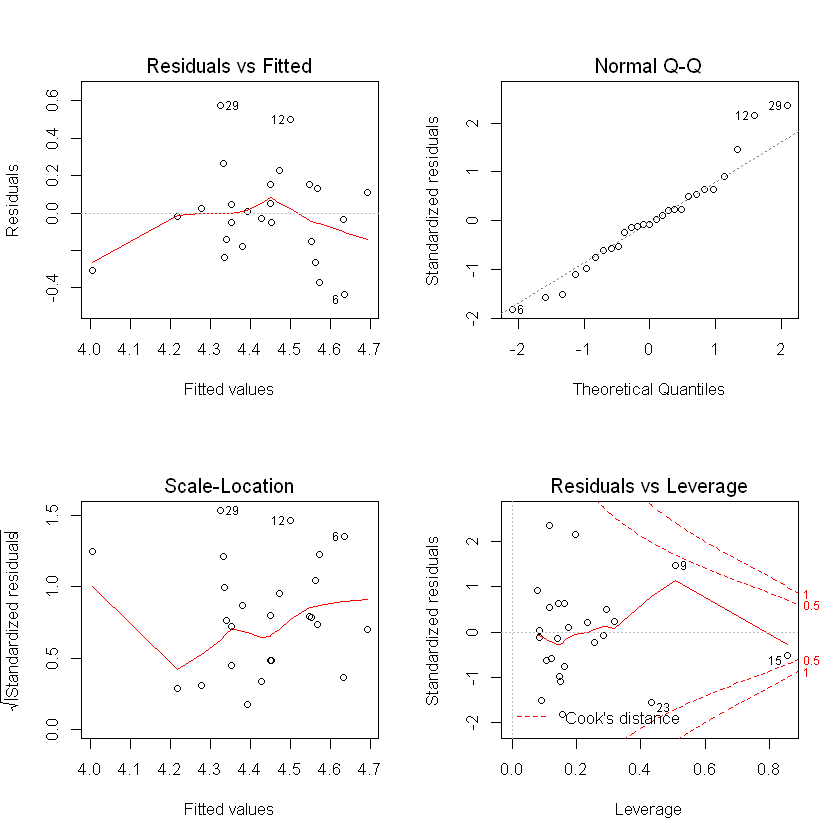

In [533]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)

nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 27

[1] 25


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43003 -0.10617 -0.01315  0.09268  0.57468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.966e+00  2.442e-01  20.334 2.36e-14 ***
Category    -1.667e-02  8.869e-03  -1.880   0.0756 .  
Reviews     -1.472e-06  7.526e-06  -0.196   0.8470    
Size        -6.734e-03  2.708e-03  -2.487   0.0223 *  
Installs    -1.070e-07  7.821e-07  -0.137   0.8926    
Price       -1.371e-04  2.104e-02  -0.007   0.9949    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2482 on 19 degrees of freedom
Multiple R-squared:  0.3844,	Adjusted R-squared:  0.2224 
F-statistic: 2.373 on 5 and 19 DF,  p-value: 0.07821


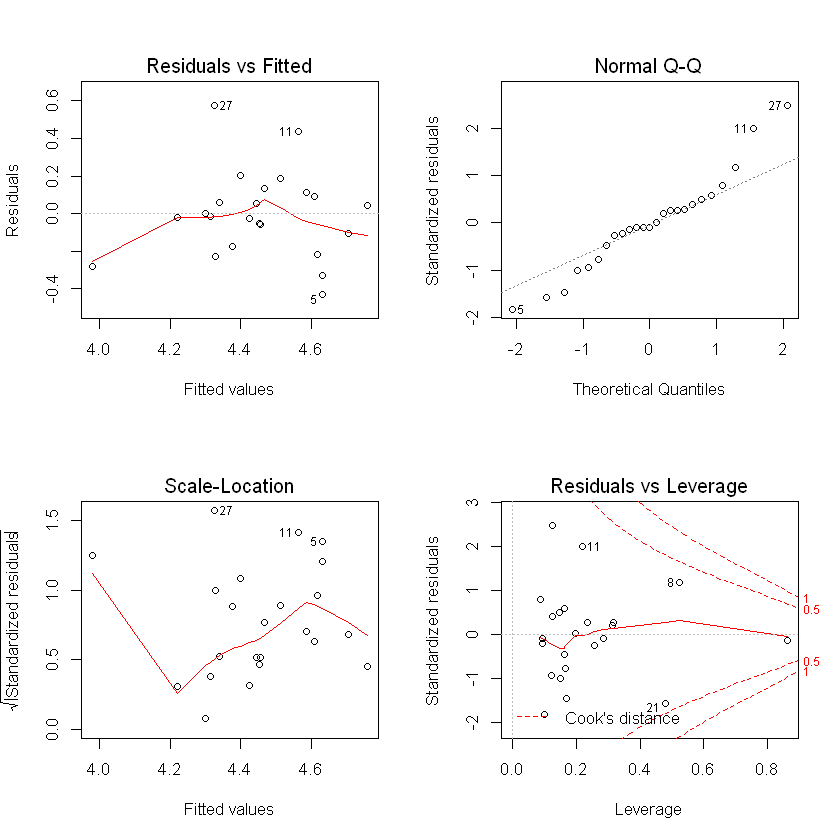

In [534]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-6, -12, -29),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

[1] 25

[1] 23


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36750 -0.11850 -0.01486  0.07520  0.57635 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.045e+00  2.402e-01  21.006 1.34e-13 ***
Category    -1.966e-02  8.654e-03  -2.272   0.0364 *  
Reviews     -1.274e-06  1.649e-05  -0.077   0.9393    
Size        -7.337e-03  2.716e-03  -2.701   0.0151 *  
Installs    -1.375e-07  1.551e-06  -0.089   0.9304    
Price        2.801e-03  2.035e-02   0.138   0.8921    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2382 on 17 degrees of freedom
Multiple R-squared:  0.4686,	Adjusted R-squared:  0.3123 
F-statistic: 2.998 on 5 and 17 DF,  p-value: 0.04045


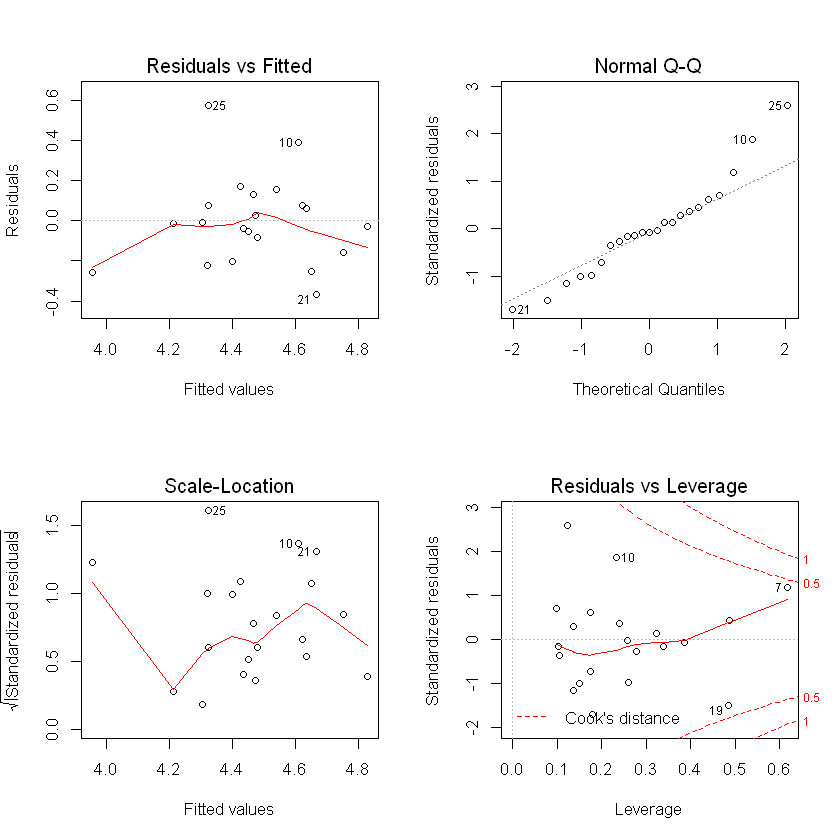

In [535]:
rownames(gplay_paid_data) <- 1:nrow(gplay_paid_data)
nrow(gplay_paid_data)
gplay_paid_data <- gplay_paid_data[c(-5, -11, -27),]
nrow(gplay_paid_data)
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)
par(mfrow=c(2,2))
plot(gplay_reg)

In [420]:
panel.cor <- function(x,y,digits=2, prefix="", cex.cor,...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr=c(0,1,0,1))
  r <- abs(cor(x,y))
  txt <- format(c(r,0.123456789),digits=digits)[1]
  txt <- paste0(prefix,txt)
  if(missing(cex.cor)) cex.cor <- 1.5/strwidth(txt)
  text(0.5,0.5,txt, cex=cex.cor*r)
}

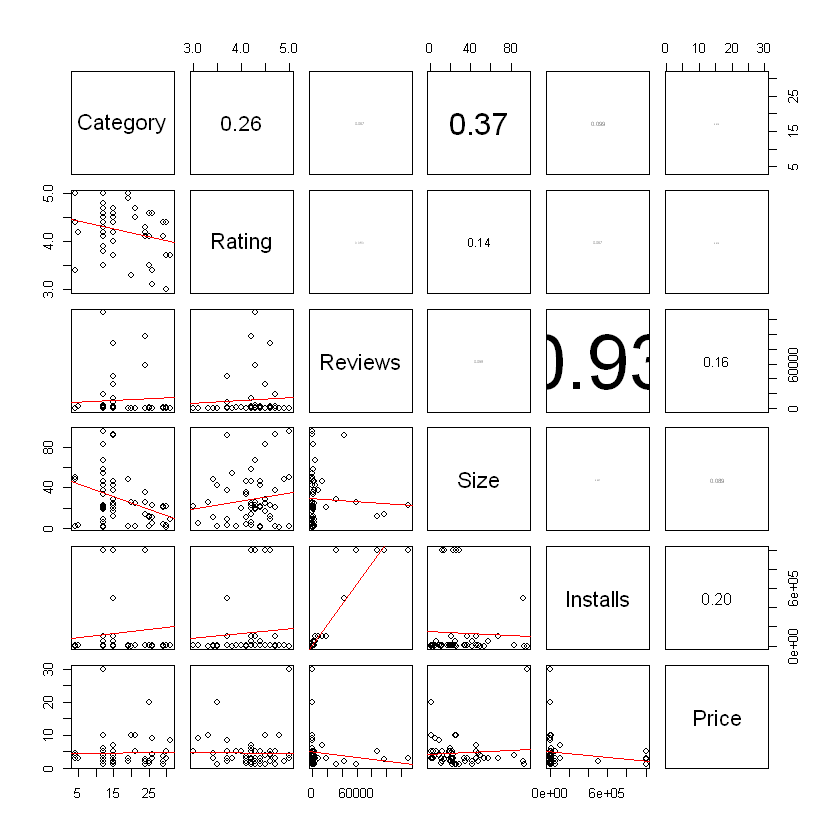

In [421]:
# panel.cor 함수는 pairs 함수 사용할때 상관계수 크기에 따라 텍스트크기가 변하도록 해주는 사용자 정의 함수 
# 우선 특정값의 평균을 나타내는 처음 10개변수의 설명변수와 class변수의 산점도 
pairs(gplay_paid_data ,
    lower.panel=function(x,y){ 
        points(x,y);
        abline(lm(y ~ x), col='red')
    },
    upper.panel = panel.cor
)

In [462]:
gplay_paid_data <- gplay_paid_data %>% dplyr::select(-Installs)

In [464]:
gplay_reg = lm(Rating ~ ., gplay_paid_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_paid_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03842 -0.20409  0.01443  0.35385  0.84234 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.454e+00  2.060e-01  21.619   <2e-16 ***
Category    -1.554e-02  8.807e-03  -1.764   0.0832 .  
Reviews      1.164e-06  2.144e-06   0.543   0.5894    
Size         1.041e-03  2.592e-03   0.402   0.6895    
Price       -7.602e-04  1.311e-02  -0.058   0.9540    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4547 on 55 degrees of freedom
Multiple R-squared:  0.07648,	Adjusted R-squared:  0.009319 
F-statistic: 1.139 on 4 and 55 DF,  p-value: 0.348


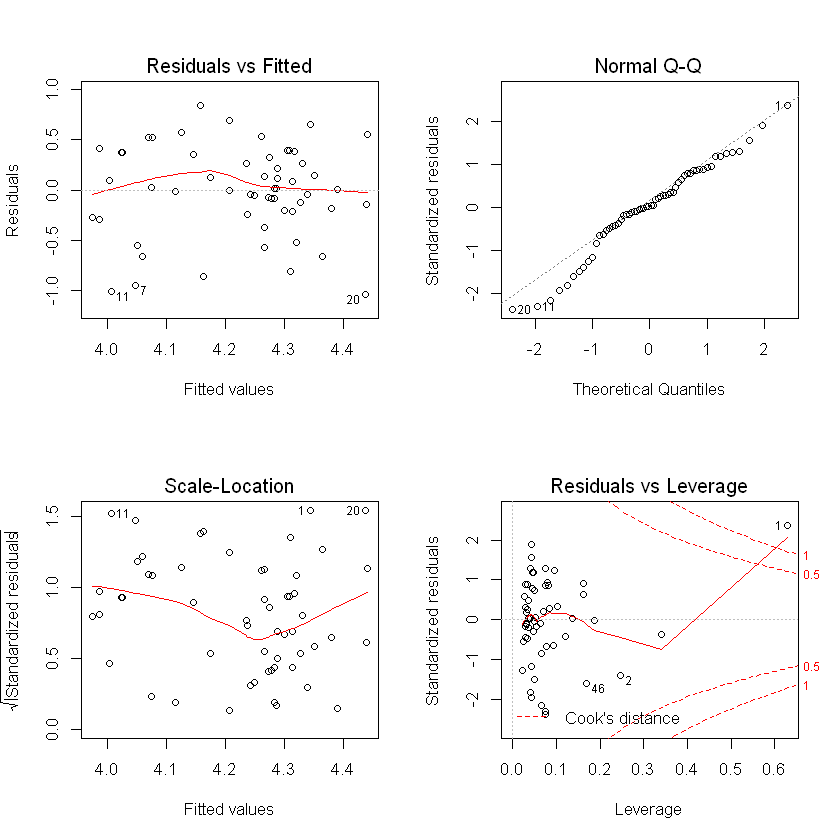

In [466]:
par(mfrow=c(2,2))
plot(gplay_reg)

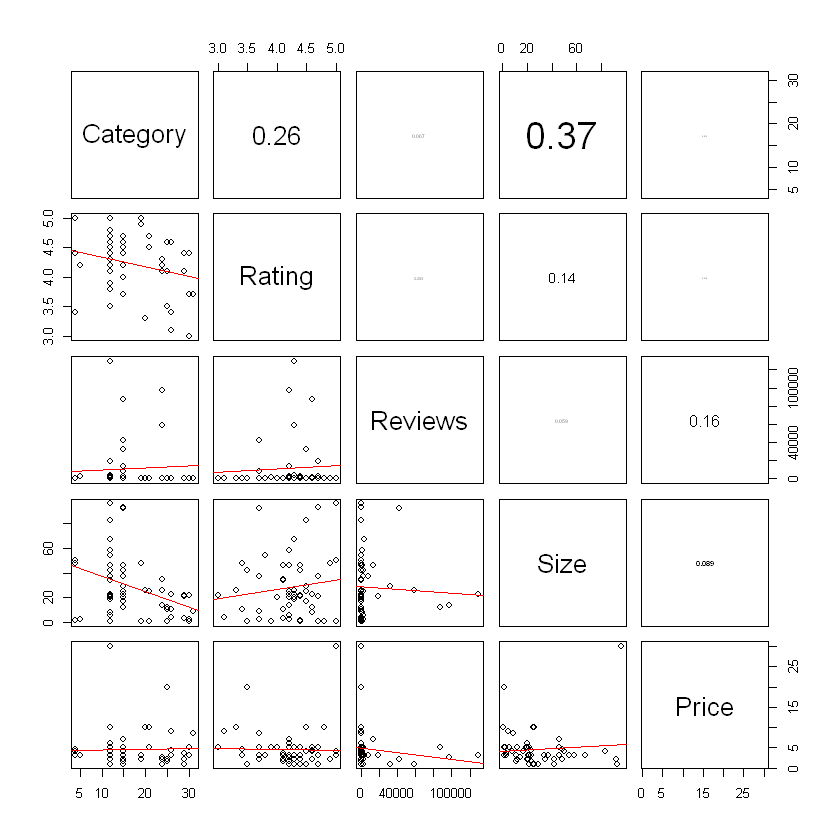

In [463]:
# panel.cor 함수는 pairs 함수 사용할때 상관계수 크기에 따라 텍스트크기가 변하도록 해주는 사용자 정의 함수 
# 우선 특정값의 평균을 나타내는 처음 10개변수의 설명변수와 class변수의 산점도 
pairs(gplay_paid_data ,
    lower.panel=function(x,y){ 
        points(x,y);
        abline(lm(y ~ x), col='red')
    },
    upper.panel = panel.cor
)